<a href="https://colab.research.google.com/github/dyhwang7/STA4320/blob/main/sta4320_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 4320 FINAL - DAEYOUNG HWANG

In [1]:
load("/content/facebook.RData")
attach(facebook)
str(facebook)


'data.frame':	489 obs. of  5 variables:
 $ interactions: int  100 164 80 1777 393 186 279 339 192 142 ...
 $ impressions : int  5091 19057 4373 87991 13594 20849 19479 24137 22538 8668 ...
 $ pagelikes   : int  139441 139441 139441 139441 139441 139441 139441 139441 139441 139441 ...
 $ paid        : int  0 0 0 1 0 0 1 1 0 0 ...
 $ type        : chr  "Photo" "Status" "Photo" "Photo" ...


1.


> a.




In [2]:
slr <- lm(interactions ~ impressions)
summary(slr)


Call:
lm(formula = interactions ~ impressions)

Residuals:
    Min      1Q  Median      3Q     Max 
-767.42  -94.59  -46.53   39.55 1638.73 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.280e+02  1.213e+01   10.55   <2e-16 ***
impressions 3.035e-03  2.765e-04   10.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 228.1 on 487 degrees of freedom
Multiple R-squared:  0.1983,	Adjusted R-squared:  0.1966 
F-statistic: 120.4 on 1 and 487 DF,  p-value: < 2.2e-16


>>i.



In [3]:
sd(impressions)
coeff <- coef(slr)
coeff
coeff * 30000

[1] 37345.33

(Intercept) impressions 
1.28019e+02 3.03482e-03

(Intercept)  impressions 
3.840570e+06 9.104459e+01

The slope estimate is 3.035 * 10 ^(-3). 

For each additional 30,000 views a post has, the mean of the total number of times the post was liked, commented on, or shared on Facebook is higher by 91.0446.

>>ii.

The intercept estimate is 128.019. 

For a Facebook post that has 0 view, the mean of the total number of times the post was liked, commented on, or shared on Facebook is 128.019.

>>iii.

In [4]:
summary(impressions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    570    5744    9035   23058   21685  277100 

This interpretation makes no logical sense because you cannot interact(like, comment, or share) with a post if you have never seen it. So each interaction needs at least 1 impression, so a post with 0 impressions and 128 interactions cannot exist

Additionally, impressions ranges from 570 to 277100, so this interpretation would also be an extrapolation outside the range of our X.

Logically, if a post has an impression of 0, the number of interaction should also be 0

>>iv.

The relationship between interactions and impressions is statistically significant because this model has a miniscule p value of 2.2 * 10^(-16), which is well below any commonly used value for alpha. The number of impressions is related to the number of interactions.

>b.

>>i.

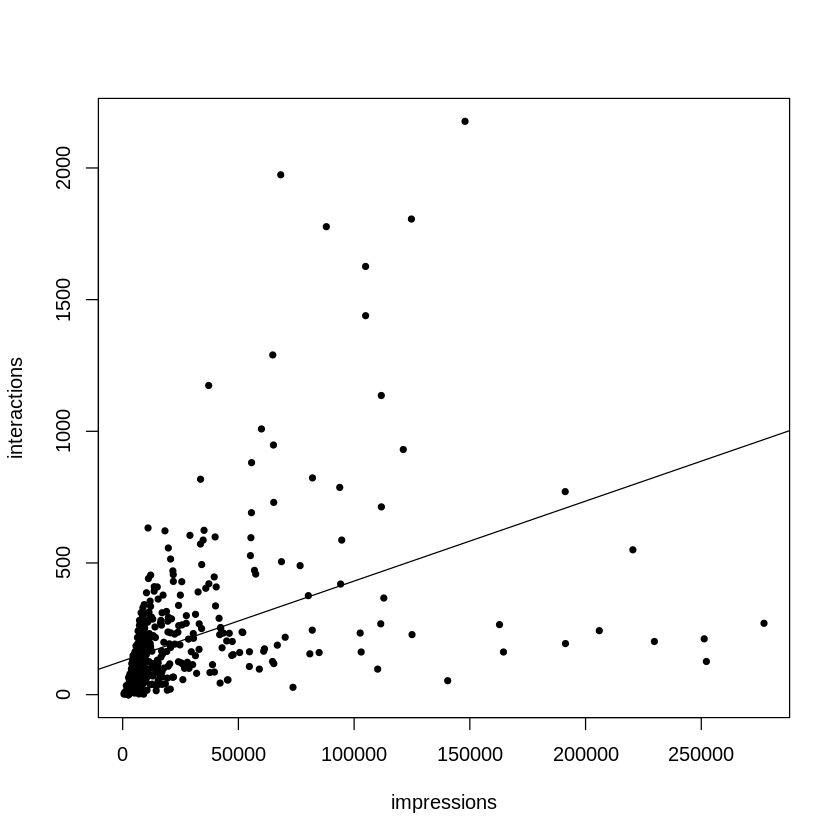

In [5]:
plot(impressions, interactions, pch=20)
abline(slr)

>>ii.

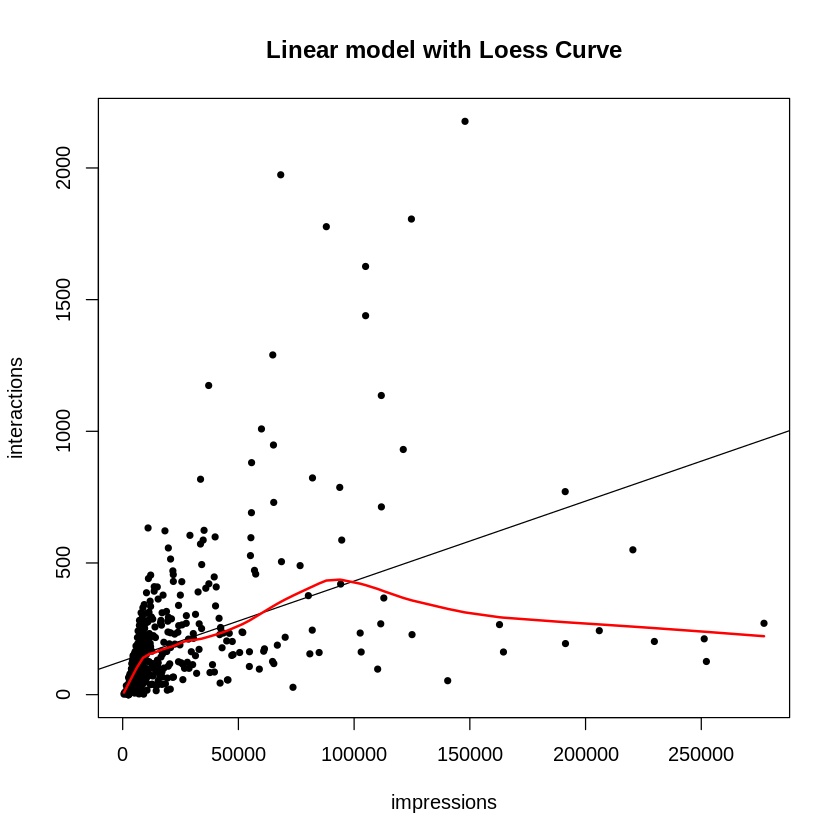

In [6]:
plot(impressions, interactions, pch=20, main="Linear model with Loess Curve")
abline(slr)
lines(lowess(impressions, interactions),col="red",lwd=2)

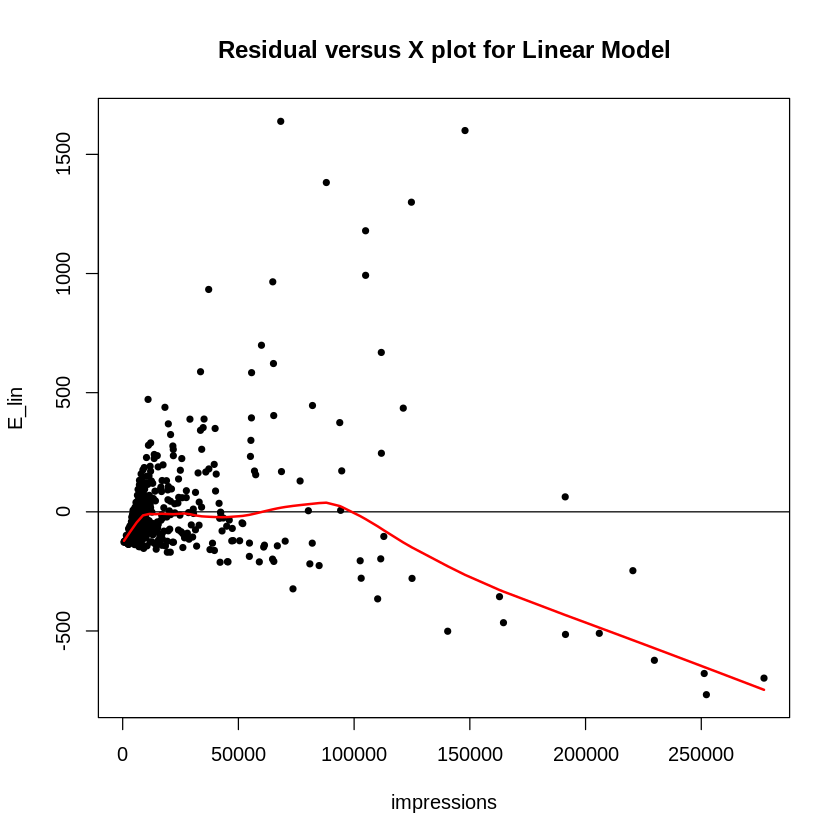

In [7]:
E_lin <- residuals(slr)
plot(impressions, E_lin, pch=20, main="Residual versus X plot for Linear Model")
abline(h=0)
lines(lowess(impressions, E_lin),col="red",lwd=2)

For impressions < ~10,000 the points are more concentrated below the line, and it looks fairly evenly spread out until X ~= 30,000 where it starts to dip below the line again until ~60,000 where it seems more concentrated above the line until impressions > ~100,000 where it's heavily concentrated below the line. 

Both the regular plot with the Loess curve and the residual versus X plot for linear model confirm this observation. Since different regions, namely where impressions < ~10,000 or impressions > ~100,000, have points that are systemtically below the line, the linearity assumption appears to be violated


Call:
lm(formula = interactions ~ poly(impressions, 2, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-623.16  -65.28  -17.58   53.05 1504.71 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.125e+01  1.303e+01   3.932 9.64e-05 ***
poly(impressions, 2, raw = TRUE)1  9.165e-03  6.214e-04  14.751  < 2e-16 ***
poly(impressions, 2, raw = TRUE)2 -3.358e-08  3.119e-09 -10.767  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 205.2 on 486 degrees of freedom
Multiple R-squared:  0.3527,	Adjusted R-squared:   0.35 
F-statistic: 132.4 on 2 and 486 DF,  p-value: < 2.2e-16


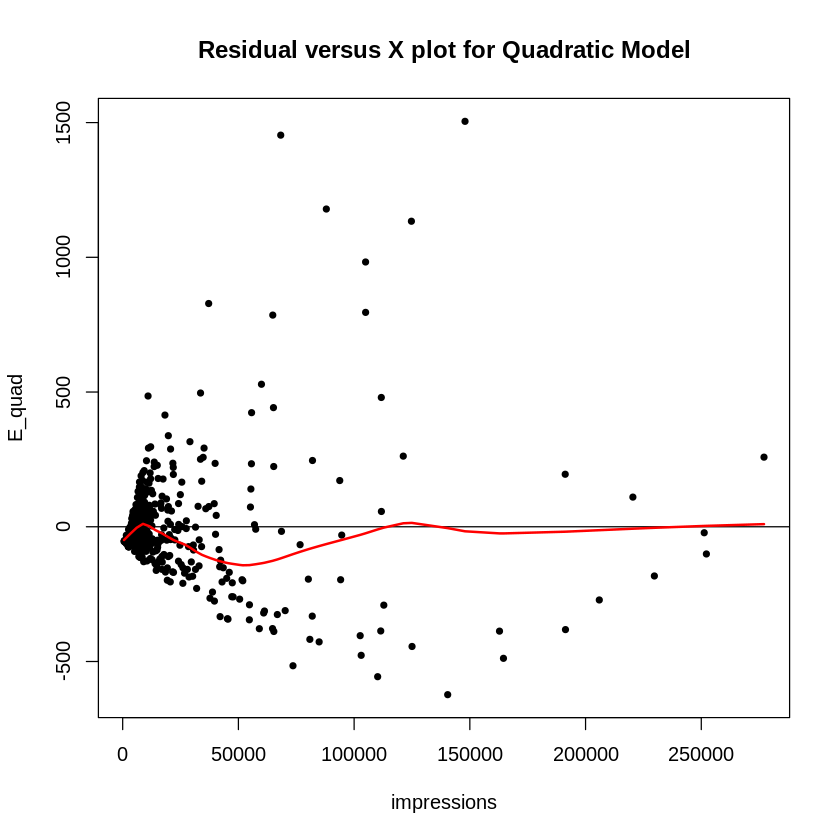

In [8]:
quad <- lm(interactions ~ poly(impressions,2,raw=TRUE))
E_quad <- residuals(quad)
plot(impressions,E_quad,pch=20,main="Residual versus X plot for Quadratic Model")
abline(h=0)
lines(lowess(impressions,E_quad),col="red",lwd=2)
summary(quad)


Call:
lm(formula = interactions ~ poly(impressions, 3, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-622.71  -65.21  -17.57   53.06 1505.21 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.113e+01  1.582e+01   3.232  0.00131 ** 
poly(impressions, 3, raw = TRUE)1  9.180e-03  1.242e-03   7.391 6.43e-13 ***
poly(impressions, 3, raw = TRUE)2 -3.379e-08  1.586e-08  -2.130  0.03368 *  
poly(impressions, 3, raw = TRUE)3  6.270e-16  4.717e-14   0.013  0.98940    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 205.4 on 485 degrees of freedom
Multiple R-squared:  0.3527,	Adjusted R-squared:  0.3487 
F-statistic: 88.08 on 3 and 485 DF,  p-value: < 2.2e-16


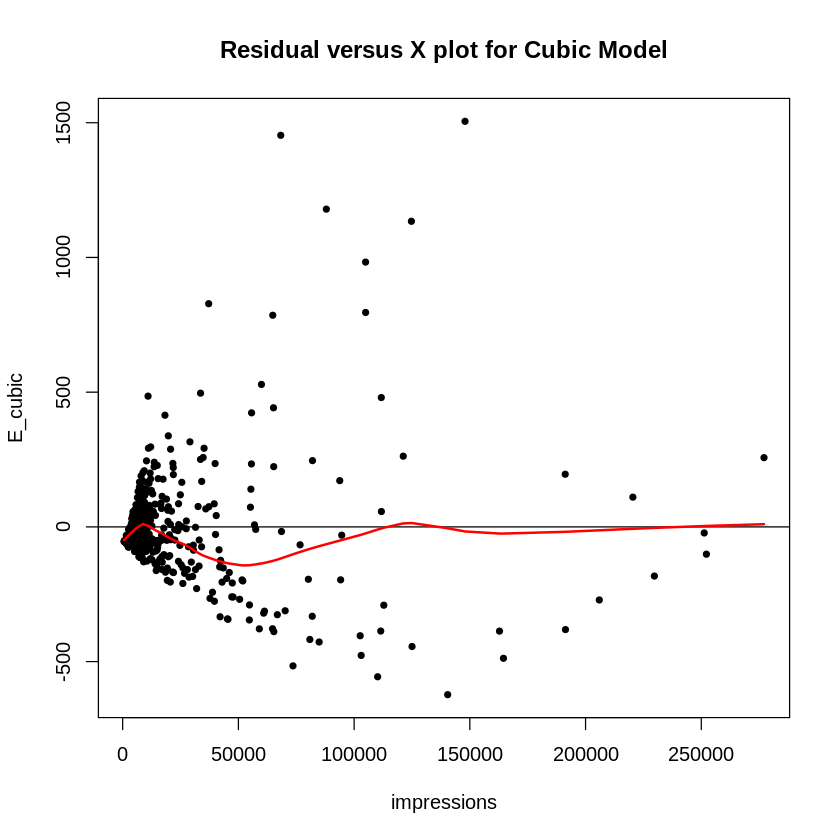

In [9]:
cubic <- lm(interactions ~ poly(impressions, 3, raw=TRUE))
E_cubic <- residuals(cubic)
plot(impressions, E_cubic, pch=20, main="Residual versus X plot for Cubic Model")
abline(h=0)
lines(lowess(impressions, E_cubic), col="red",lwd=2)
summary(cubic)

After attempting the quadratic and cubic models for the variables impressions and interactions, it appears like both are an improvement in helping with linearity over the linear model. It is evidenced by both the residual versus X plots above where the points are more bottom heavy only when roughly 10,000 < impressions < 100,000, for the rest of values of impressions, the distribution across the line seems much more even than the SLR.

The quadratic and the cubic models also seem to fit the model better than the SLR model. The SLR's RMSE value was 228.1 and R^2 of 0.1983. Both the quadratic's respective values of 205.2 and 0.3527 and cubic's 205.4 and 0.3527 are better than the SLR's. 

>>iii.

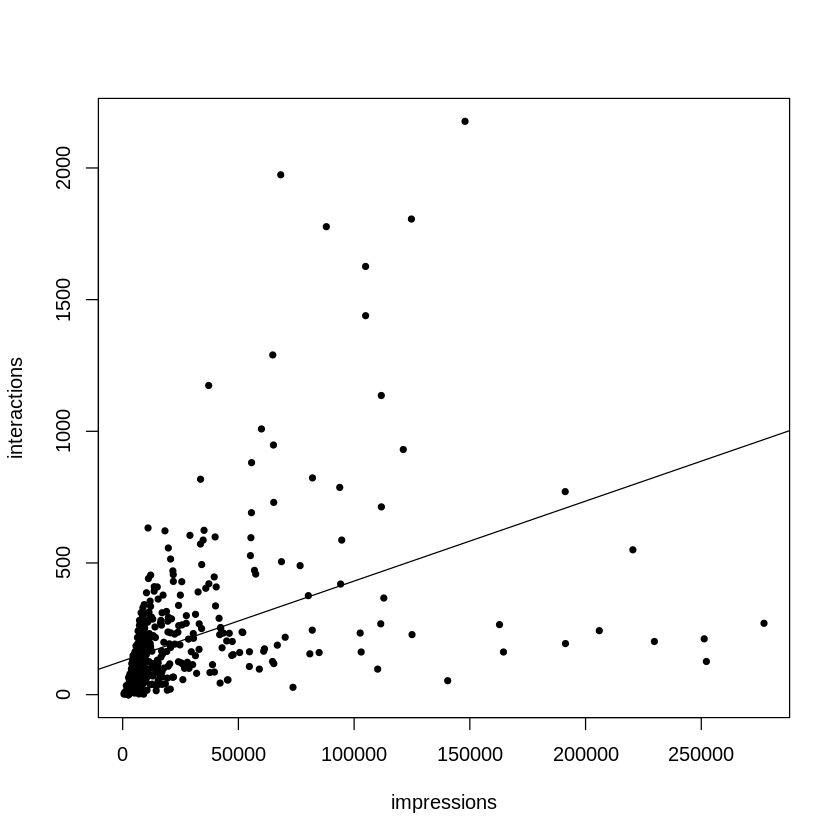

In [10]:
plot(impressions, interactions, pch=20)
abline(slr)

Yes, it appears violated because the spread of points about the line is significantly closer at impressions < ~50,000 than at impressions >= ~50,000. 

>>iv.

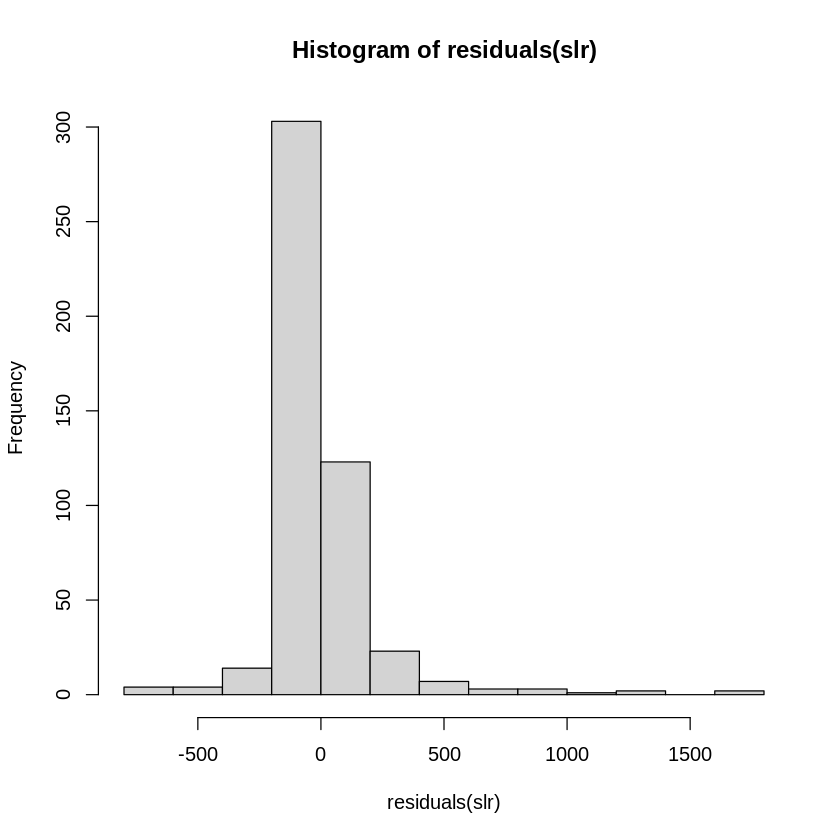

In [11]:
hist(residuals(slr))

Normality assumption appears violated because the residuals appear to have a substantial right skew evidenced by the unusually large left tail on the histogram. 

>>v.

I would think independence is violated as well because as mentioned in 1.a.iii, an impression is necessary for an interaction to occur, meaning that interaction is dependent on impression. 

>c.

>>i.

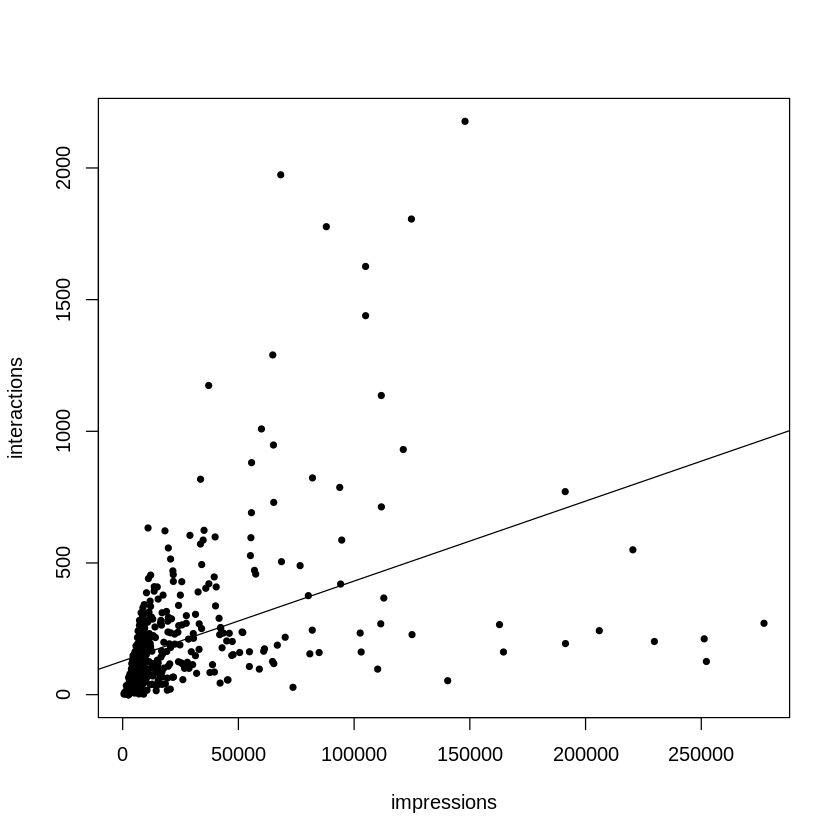

In [12]:
plot(impressions, interactions, pch=20)
abline(slr)

>>ii.

[1] 0.00408998

[1] 0.00408998

18  62  72 106 138 142 148 200 203 224 267 273 275 345 375 376 393 436 440 443 
 18  62  72 106 138 142 148 200 203 224 267 273 275 345 375 376 393 436 440 443

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    570    5744    9035   23058   21685  277100 

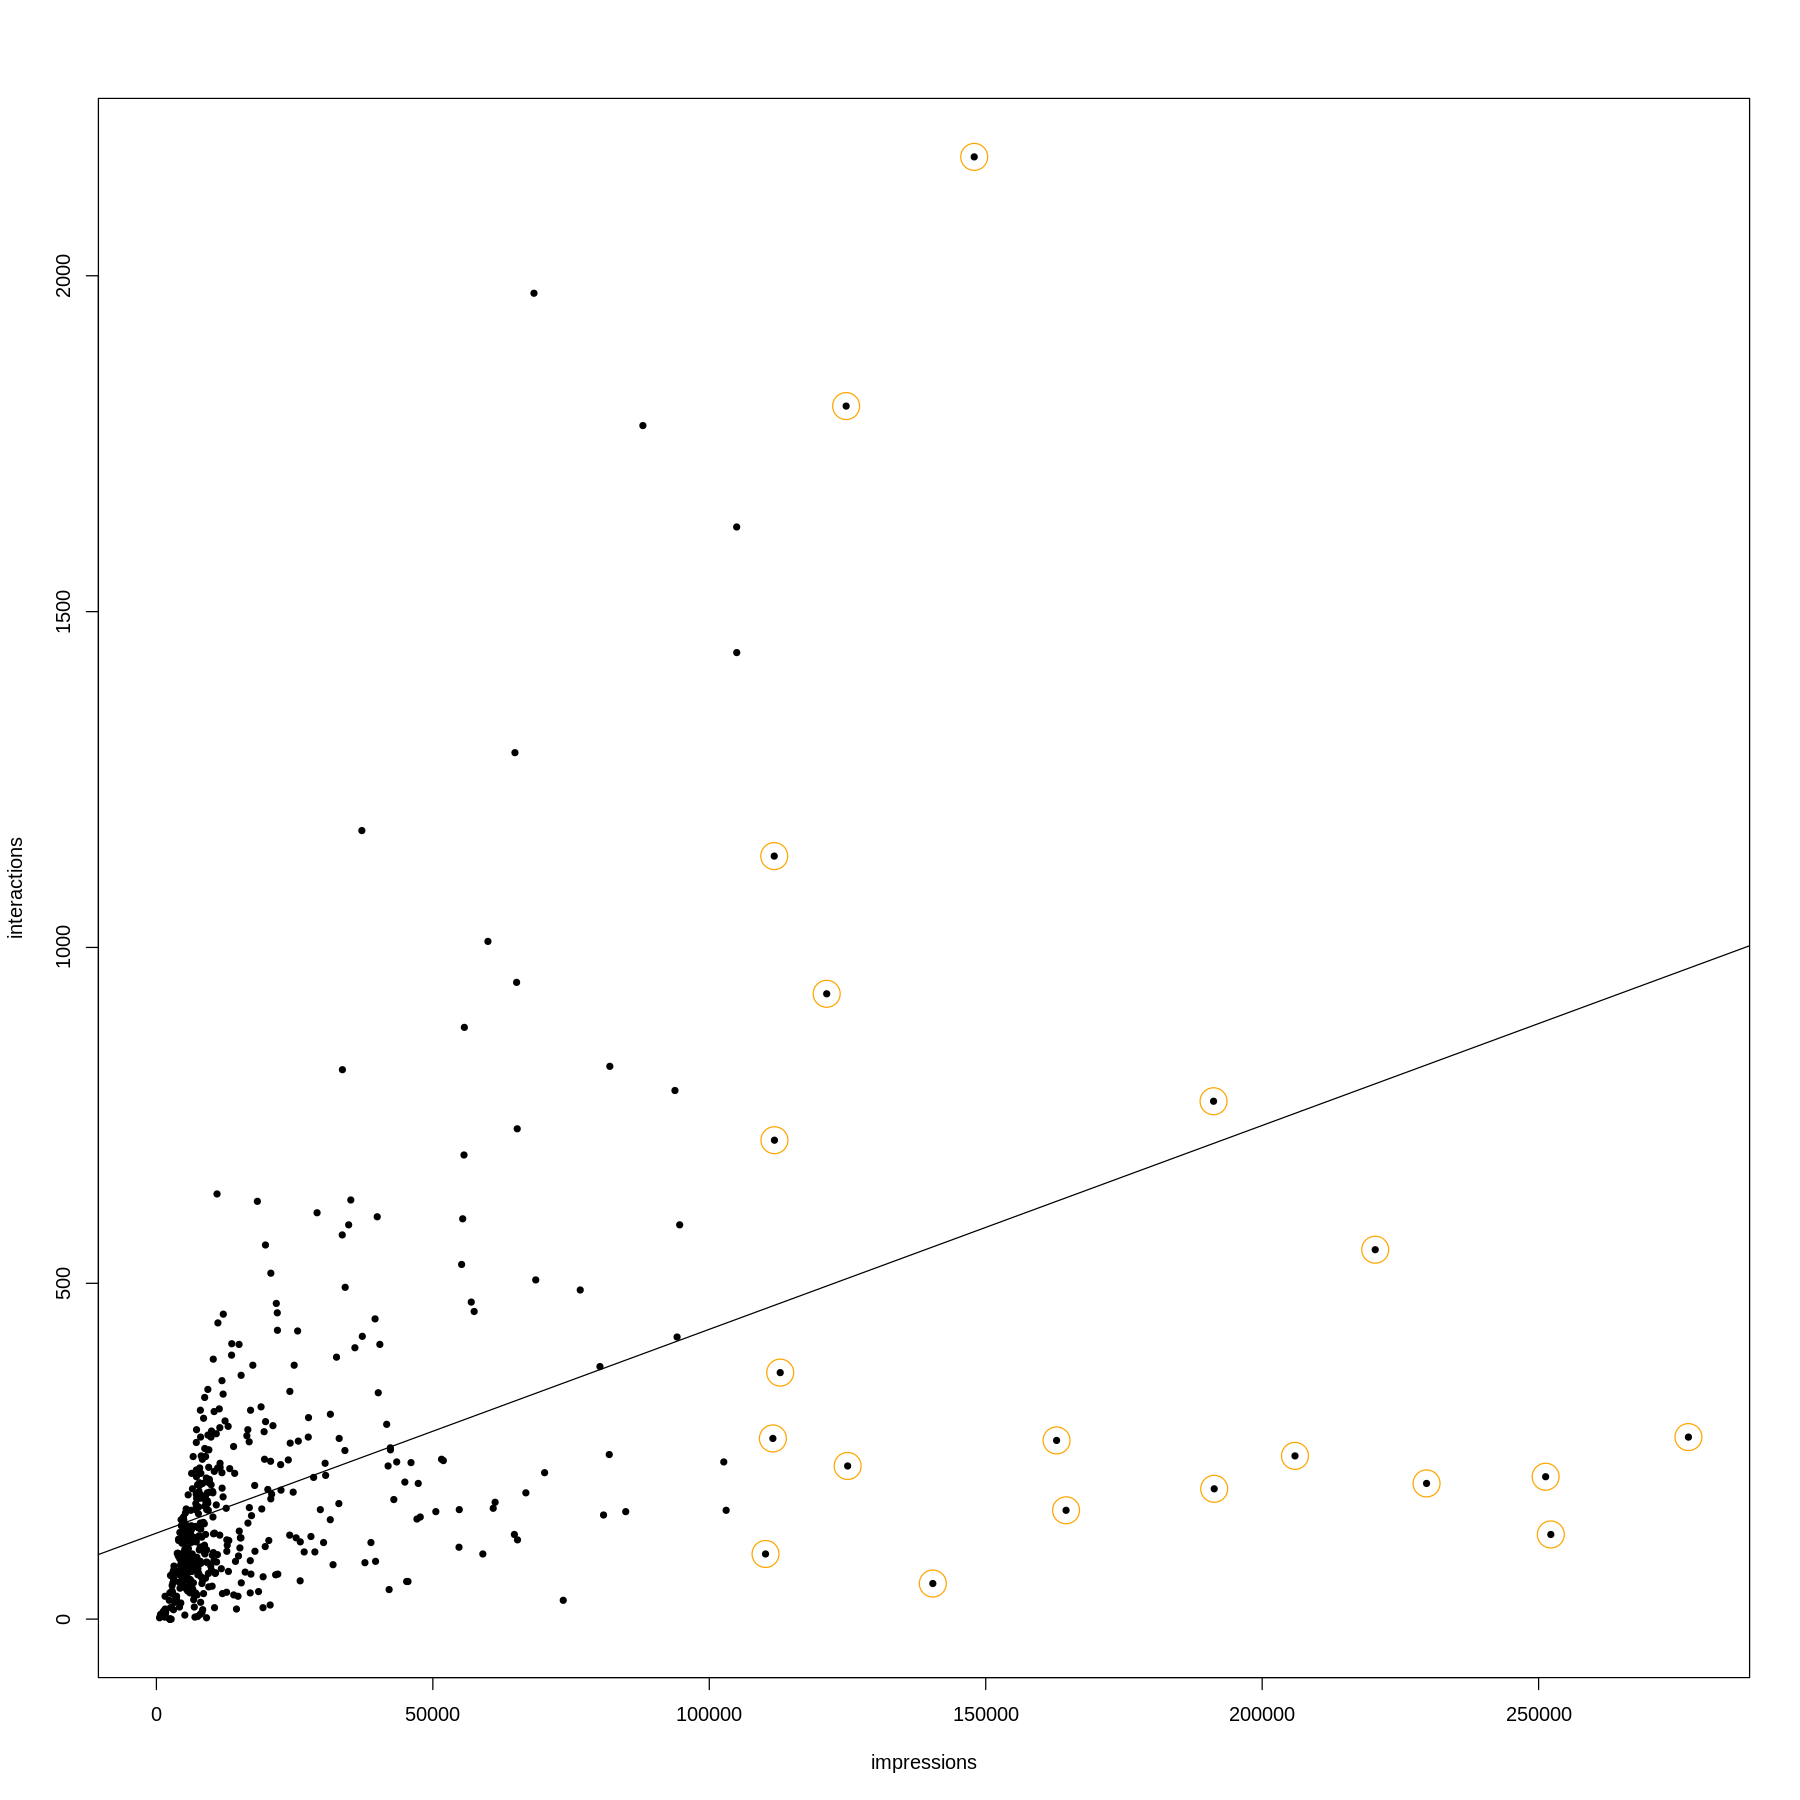

In [13]:
h <- hatvalues(slr)
hbar <- mean(h)
hbar 
k = 1
n = nrow(facebook)
hbar <- (k + 1)/n
hbar

high_lev <- which(h > 3 * hbar)
high_lev

summary(impressions)
options(repr.plot.width=15, repr.plot.height=15)
plot(impressions, interactions, pch=20)
abline(slr)
points(impressions[high_lev], interactions[high_lev], col="orange", cex=3)

>>iii.

4 102 140 165 173 196 224 273 319 345 375 376 
  4 102 140 165 173 196 224 273 319 345 375 376

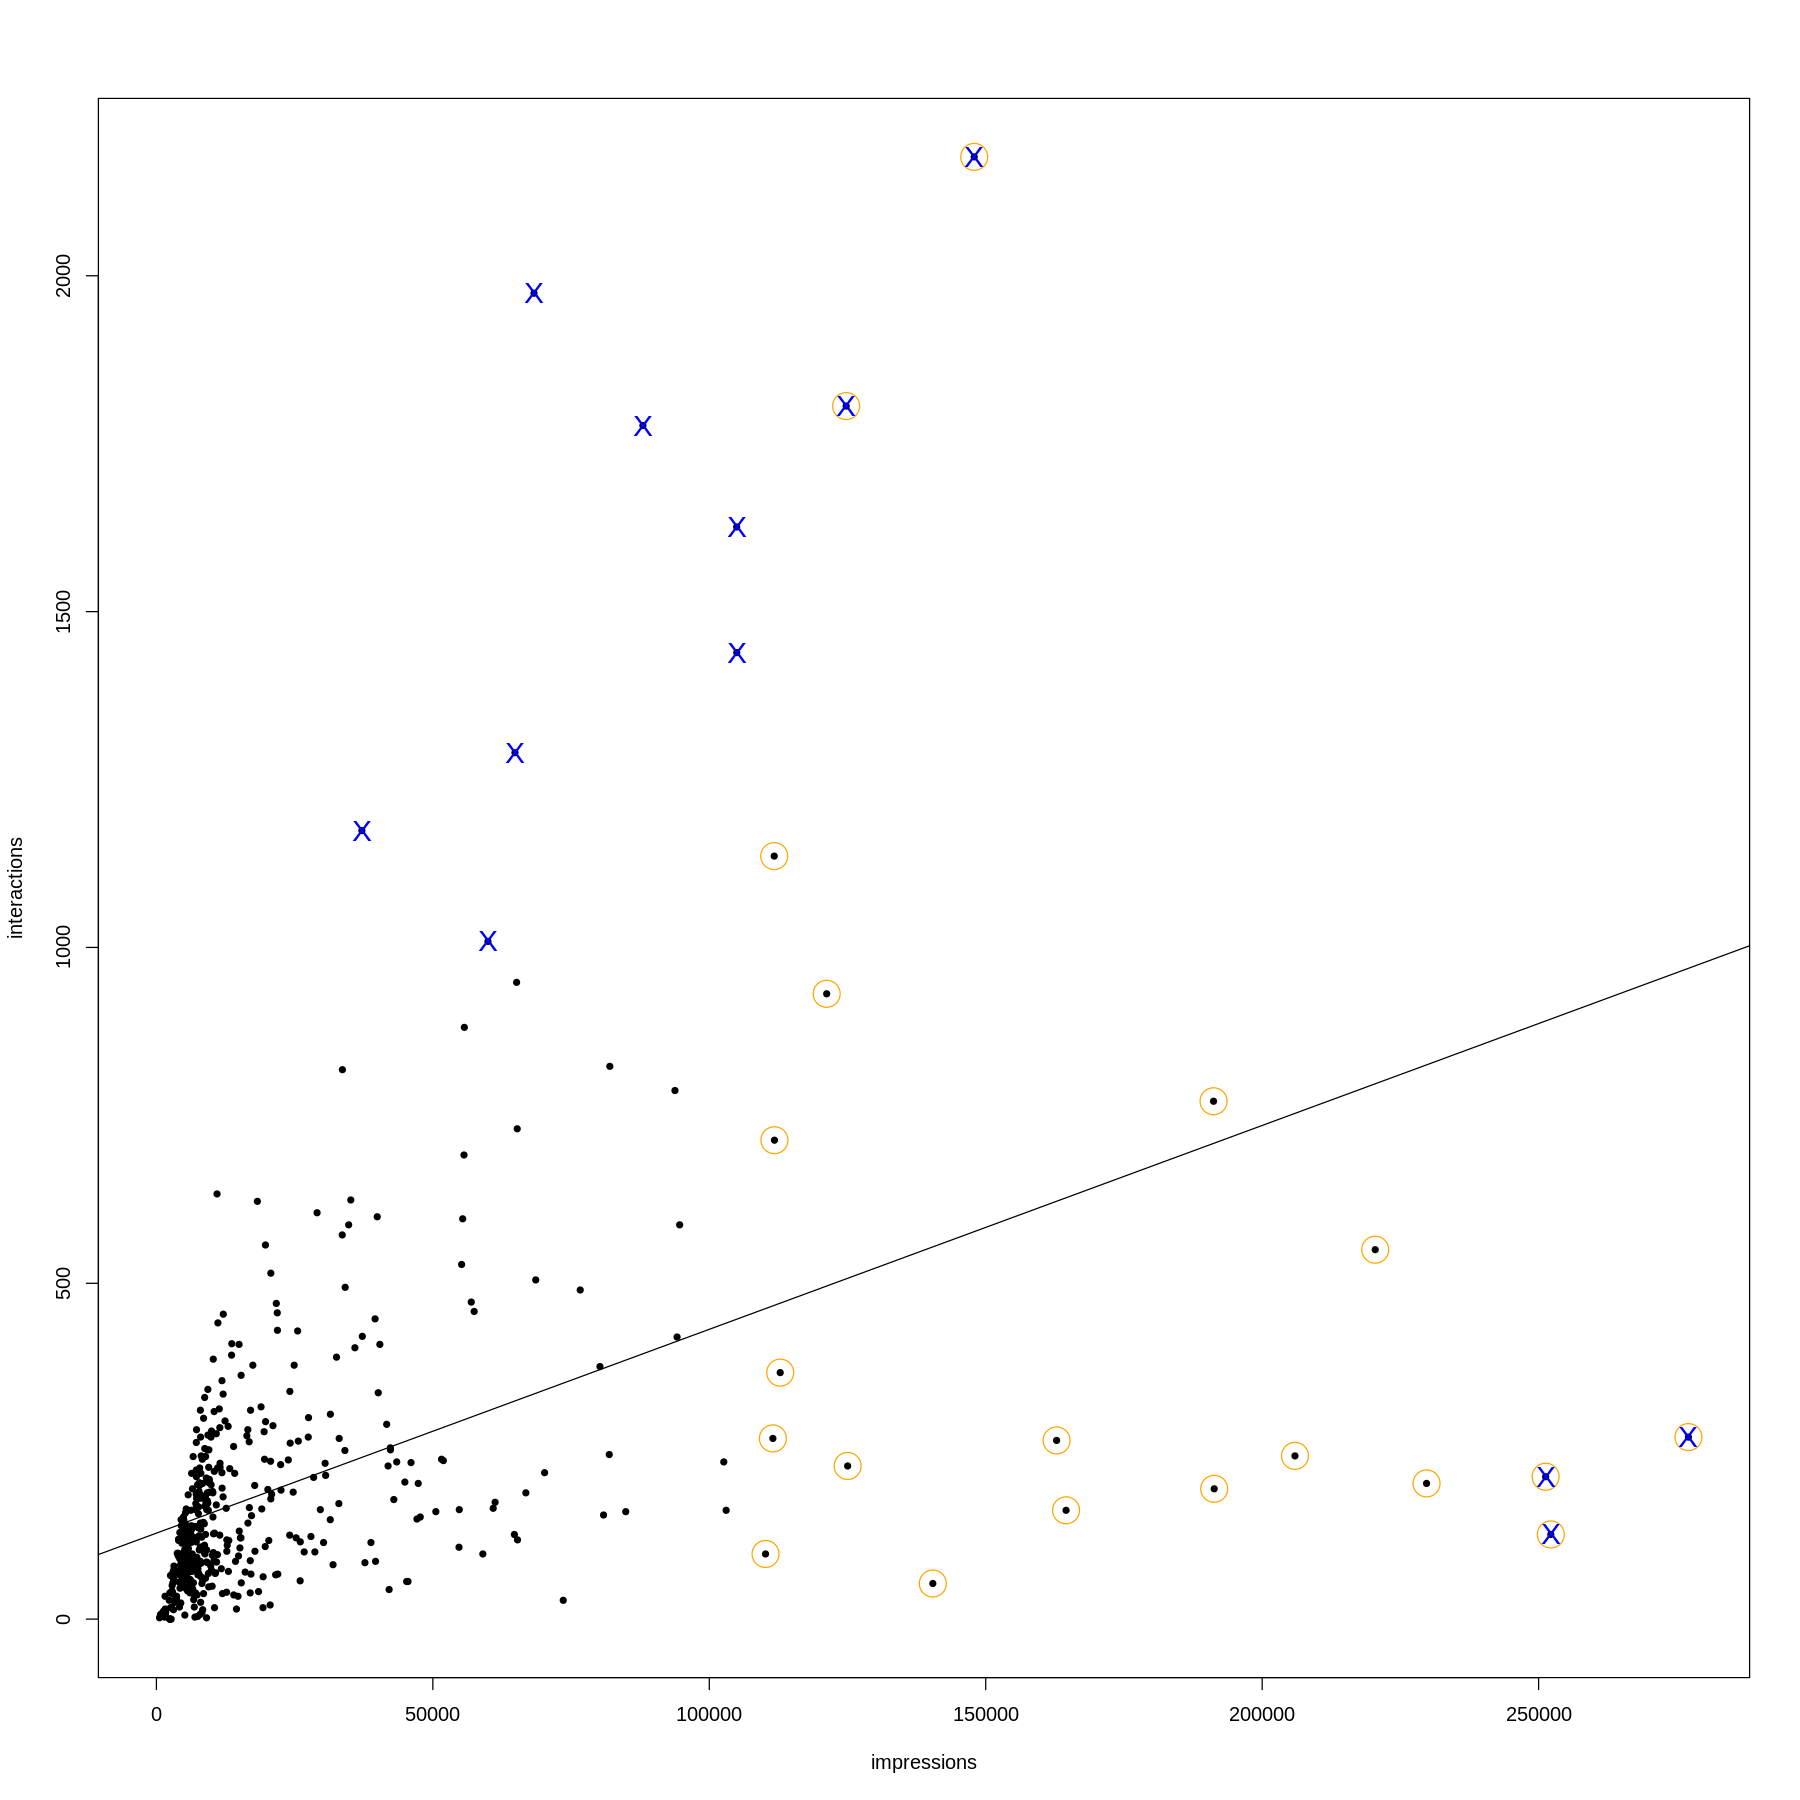

In [14]:
E_star <- rstudent(slr)
cutoff <- 3
high_resid <- which(abs(E_star) > cutoff)
high_resid
options(repr.plot.width=15, repr.plot.height=15)
plot(impressions, interactions, pch=20)
abline(slr)
points(impressions[high_lev], interactions[high_lev], col="orange", cex=3)
points(impressions[high_resid], interactions[high_resid], col="blue", pch="X", cex=1.5)

>>iv.

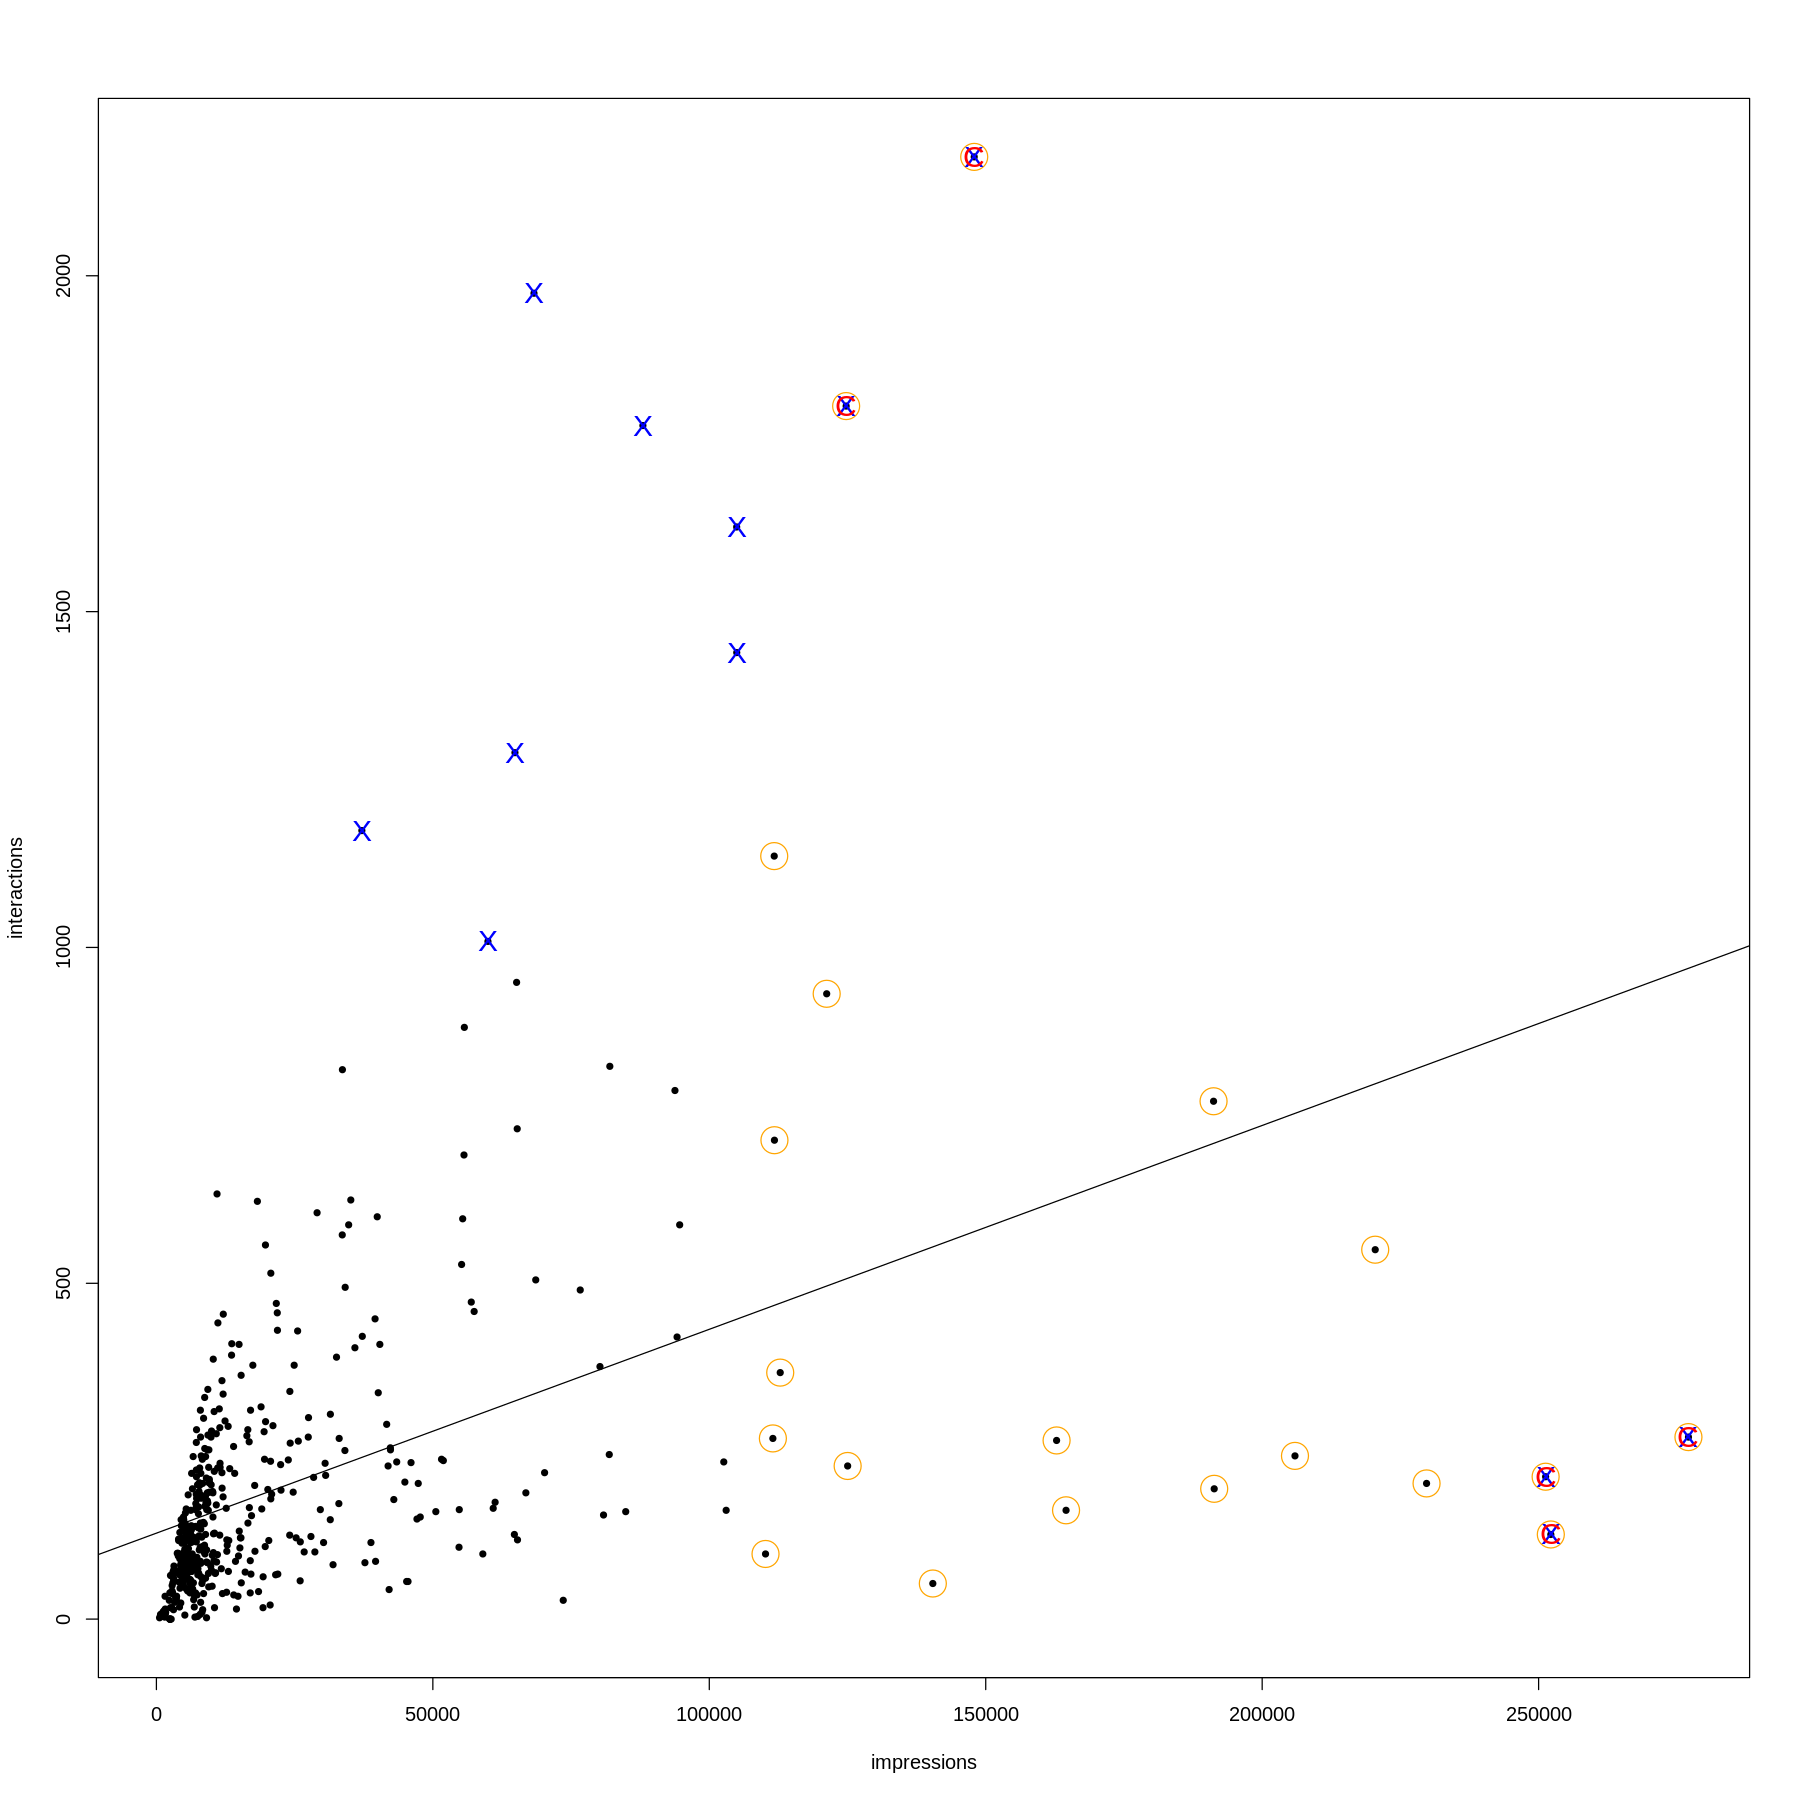

In [15]:
D <- cooks.distance(slr)
k = 1
n = nrow(facebook)
high_cook <- which(D > 0.28)
options(repr.plot.width=15, repr.plot.height=15)
plot(impressions, interactions, pch=20)
abline(slr)
points(impressions[high_lev], interactions[high_lev], col="orange", cex=3)
points(impressions[high_resid], interactions[high_resid], col="blue", pch="X", cex = 1.5)
points(impressions[high_cook], interactions[high_cook], col="red", pch="C", cex=1.5)

>>v.

In [16]:
high_cook
length(high_cook)


224 273 345 375 376 
224 273 345 375 376

[1] 5

There were 5 points that were flagged as being influential by Cook's Distance. 

In [17]:
high_cook
intersect(high_lev, high_resid)

224 273 345 375 376 
224 273 345 375 376

[1] 224 273 345 375 376

All 5 points that were flagged as being influential by Cook's Distance are also both high leverage and high residual points

In [18]:
intersect(high_lev, high_resid)
intersect(intersect(high_lev, high_resid), high_cook)

[1] 224 273 345 375 376

[1] 224 273 345 375 376

As shown in the code above and also in the graph, all the points that are high leverage and high residual were all marked as influential by Cook's distance. Therefore, no there weren't any points that were both high leverage and high residuals that were not flagged as influential by Cook's Distance

2.

>a.

In [19]:
mlr <- lm(interactions ~ pagelikes + paid + factor(type))
summary(mlr)


Call:
lm(formula = interactions ~ pagelikes + paid + factor(type))

Residuals:
    Min      1Q  Median      3Q     Max 
-250.15 -125.47  -65.70   29.56 1952.46 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -41.806456 100.923998  -0.414   0.6789  
pagelikes            0.001008   0.000731   1.379   0.1684  
paid                49.530764  25.569973   1.937   0.0533 .
factor(type)Photo  104.252284  55.530266   1.877   0.0611 .
factor(type)Status 114.079492  66.888092   1.706   0.0887 .
factor(type)Video  173.207973 110.871460   1.562   0.1189  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 253 on 483 degrees of freedom
Multiple R-squared:  0.02247,	Adjusted R-squared:  0.01235 
F-statistic:  2.22 on 5 and 483 DF,  p-value: 0.0512


>>i.

In [20]:
mlr_coeff <- coef(mlr)
sd(pagelikes)
mlr_coeff[2] * 10000

[1] 16060.82

pagelikes 
 10.08425

B1 = 0.001008; For each additional 10,000 likes on a Facebook post, its total number of likes, comments, and shares is higher by 10 on average assuming the same value for whether the post is a paid advertisement and assuming the same type of post. 

>>ii.

B2 = 49.530764; The mean total number of likes, comments, and shares on a Facebook post is 49.53 higher for paid advertisements than for regular non-paid post, assuming the same type of post and assuming pagelikes is fixed

>>iii.

B3 = 104.252284; The mean total number of likes, comments, and shares on a Facebook post is 104.25 higher for posts that are photos than those that are links, assuming the same value for whether the post is a paid advertisement and assuming pagelikes is fixed

>>iv.

Because B5 = 173.207973 is greater than B3 and B4 and is positive, videos appear to get the most interactions on average assuming the same value for whether the post is a paid advertisement and assuming pagelikes is fixed.

Because all B3, B4, B5 are positive, links, the reference group, appear to get the least interactions on average assuming the same value for whether the post is a paid advertisement and assuming pagelikes is fixed.



>b.

>>i.

Using Overall F-test 

H0: beta1=beta2=beta3=beta4=beta5=0; None of the variables pagelikes, paid, and type is related to the total number of likes, comments, and shares a Facebook post gets

HA: betaj != 0 for some j = 1, 2, 3, 4, or 5; At least one of pagelikes, paid, and type is related to the total number of likes, comments, and shares a Facebook post gets

>>ii.

In [21]:
summary(mlr)


Call:
lm(formula = interactions ~ pagelikes + paid + factor(type))

Residuals:
    Min      1Q  Median      3Q     Max 
-250.15 -125.47  -65.70   29.56 1952.46 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -41.806456 100.923998  -0.414   0.6789  
pagelikes            0.001008   0.000731   1.379   0.1684  
paid                49.530764  25.569973   1.937   0.0533 .
factor(type)Photo  104.252284  55.530266   1.877   0.0611 .
factor(type)Status 114.079492  66.888092   1.706   0.0887 .
factor(type)Video  173.207973 110.871460   1.562   0.1189  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 253 on 483 degrees of freedom
Multiple R-squared:  0.02247,	Adjusted R-squared:  0.01235 
F-statistic:  2.22 on 5 and 483 DF,  p-value: 0.0512


F-statistic = 2.22 and p-value = 0.0512

>>iii.

Because alpha of 0.05 < p-value of 0.0512, we fail to reject H0. We have no evidence that any of the variables pagelikes, paid, and type is related to the total number of likes, comments, and shares a Facebook post gets

>>iv.

Had alpha been 0.06, because it's > than p-value of 0.0512, at least one of the variables pagelikes, paid, and type is related to the total number of likes, comments, and shares a Facebook post gets.

I think we have little evidence that any of the three X's are related to interactions. P-values far into either side of the spectrum gives us more confidence that there is a lot of evidence or not, but because this is right at the cusp of one of the most commonly used values of alpha = 0.05, while evidence is not 0, it is not a lot.